## This notebook will explore and analyze the Heart Disease dataset, and build some basic models to determine whether we can predict whether someone will die of heart disease based on some background characteristics.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [240]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_palette("pastel")

First let's take a look at the dataset to get an idea of what the data look like, the features of the dataset, the variable types (numerical/categorical), missing values, and some summary statistics.

In [241]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [242]:
df.shape

(299, 13)

In [243]:
# check for missing values in the dataset

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [244]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [245]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [246]:
#df.head(1)

First let's take a look at the distributions of the different variables, seperated out by numeric and categorical variables.

<AxesSubplot:title={'center':'Serum Creatinine Distribution'}, xlabel='serum_creatinine', ylabel='Count'>

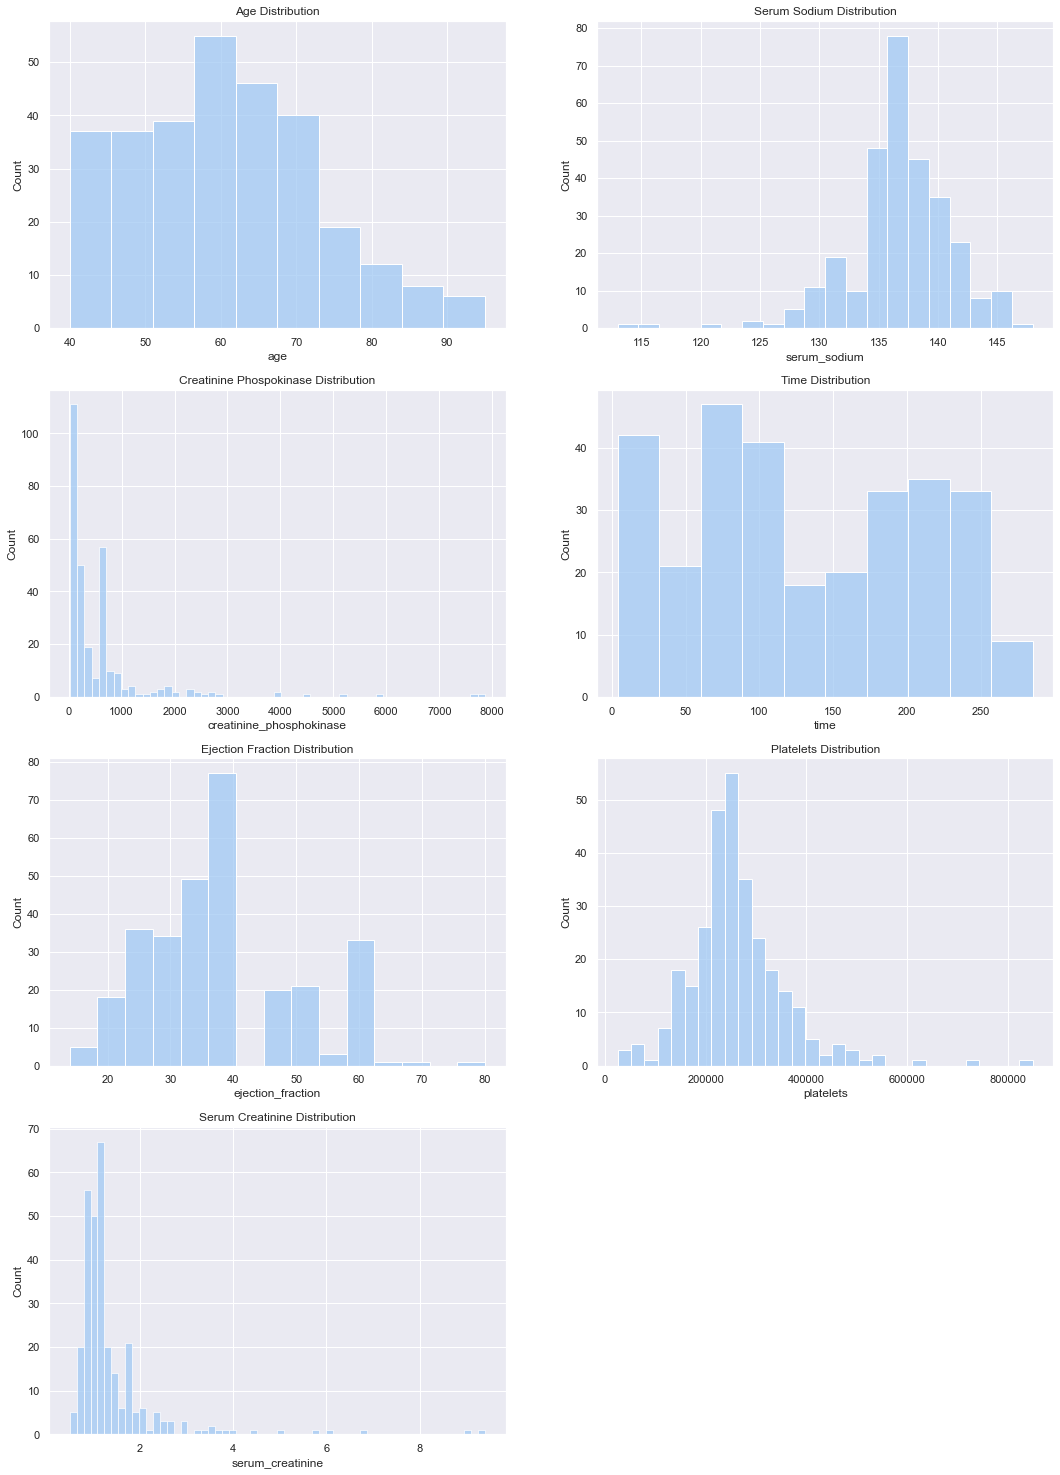

In [247]:
# examine the distribution of the numeric variables

fig = plt.figure(figsize = (18, 26)).tight_layout(h_pad=5.0, w_pad = 5.0)

plt.subplot(421)
plt.title('Age Distribution')
sns.histplot(df.age)

plt.subplot(422)
plt.title('Serum Sodium Distribution')
sns.histplot(df.serum_sodium)

plt.subplot(423)
plt.title('Creatinine Phospokinase Distribution')
sns.histplot(df.creatinine_phosphokinase)

plt.subplot(424)
plt.title('Time Distribution')
sns.histplot(df.time)

plt.subplot(425)
plt.title('Ejection Fraction Distribution')
sns.histplot(df.ejection_fraction)

plt.subplot(426)
plt.title('Platelets Distribution')
sns.histplot(df.platelets)

plt.subplot(427)
plt.title('Serum Creatinine Distribution')
sns.histplot(df.serum_creatinine)

I notice the serum_creatinine and creatinine_phosphokinase features are heavily right-skewed, with serum_sodium left-skewed. This will be important to keep in mind as we move forward. Now let's visualize the value counts of the categorical variables.

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

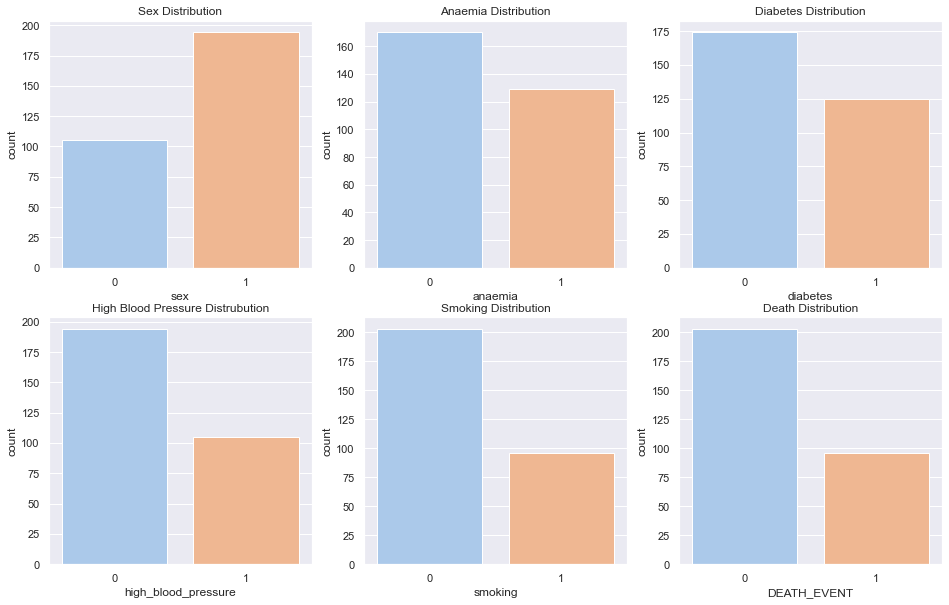

In [248]:
# examine the distribution of the categorical variables

fig = plt.figure(figsize = (16, 10)).tight_layout(pad=3.0)

plt.subplot(231)
plt.title('Sex Distribution')
sns.countplot(df.sex)

plt.subplot(232)
plt.title('Anaemia Distribution')
sns.countplot(df.anaemia)

plt.subplot(233)
plt.title('Diabetes Distribution')
sns.countplot(df.diabetes)

plt.subplot(234)
plt.title('High Blood Pressure Distrubution')
sns.countplot(df.high_blood_pressure)

plt.subplot(235)
plt.title('Smoking Distribution')
sns.countplot(df.smoking)

plt.subplot(236)
plt.title('Death Distribution')
sns.countplot(df.DEATH_EVENT)

plt.show()

I notice the number of survivors is roughly double the number of deaths in the sample.  The same is true for non-smokers vs smokers, and normal blood pressure vs high blood pressure.

I will now seperate the features into numerical and categorical variables, and will standardize the numerical variables.

In [249]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [250]:
df_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
df_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

In [251]:
df_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


In [252]:
# converting age and platelets to integers for simplicity

df_num['age'] = [int(x) for x in df_num.age]
df_num['platelets'] = [int (x) for x in df_num.platelets]
df_num.head()

<ipython-input-252-501a187c556b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['age'] = [int(x) for x in df_num.age]
<ipython-input-252-501a187c556b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['platelets'] = [int (x) for x in df_num.platelets]


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75,582,20,265000,1.9,130,4
1,55,7861,38,263358,1.1,136,6
2,65,146,20,162000,1.3,129,7
3,50,111,20,210000,1.9,137,7
4,65,160,20,327000,2.7,116,8


In [253]:
# scaling the numerical data via standardscaler

sc = StandardScaler()
df_cols = df_num.columns
df_num_scaled = sc.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns = df_cols)
df_num_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.193302,0.000166,-1.530560,1.681651e-02,0.490057,-1.504036,-1.629502
1,-0.490896,7.514640,-0.007077,-2.740240e-07,-0.284552,-0.141976,-1.603691
2,0.351203,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.911945,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.351203,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [254]:
# master dataframe (unscaled)
df_master = pd.concat([df_num, df_cat], axis=1)
df_master.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75,582,20,265000,1.9,130,4,0,0,1,1,0,1
1,55,7861,38,263358,1.1,136,6,0,0,0,1,0,1
2,65,146,20,162000,1.3,129,7,0,0,0,1,1,1
3,50,111,20,210000,1.9,137,7,1,0,0,1,0,1
4,65,160,20,327000,2.7,116,8,1,1,0,0,0,1


In [255]:
# master dataframe (scaled)
df_master_scaled = pd.concat([df_num_scaled, df_cat], axis=1)
df_master_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.193302,0.000166,-1.530560,1.681651e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,-0.490896,7.514640,-0.007077,-2.740240e-07,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0.351203,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.911945,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0.351203,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


Let's take a look at any correlations that exist between the features.

<AxesSubplot:>

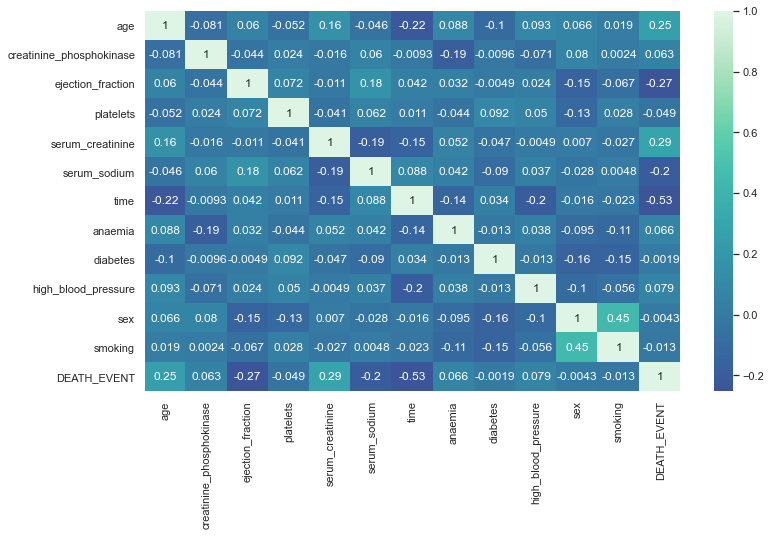

In [256]:
# heatmap to identify correlations between features

fig = plt.figure(figsize = (12, 7))
sns.heatmap(df_master_scaled.corr(), center=0, cmap='mako', robust=True, annot=True)

I note fairly significant correlations between death (our dependent variable), and the independent variables age, ejection fraction, serum_creatinine, serum_sodium, and time (which has the largest correlation).  Let's take a look.

Median Age for Death:  65.0 
Median age for Survivor:  60.0 
Difference:  5.0


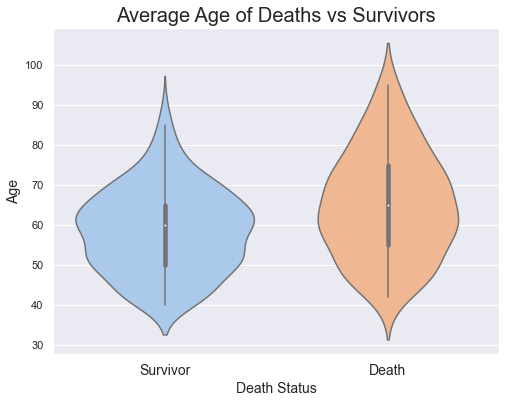

In [257]:
# want to plot correlation between age and death_event
# show median age of those who died vs those who survived
# plot mean age of those who died and those who did not

median_death = df_master[df_master['DEATH_EVENT']==1]['age'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['age'].median()
print("Median Age for Death: ", median_death, '\nMedian age for Survivor: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='age')
ax.set_title('Average Age of Deaths vs Survivors', fontsize=20)
ax.set_xlabel('Death Status', fontsize=14)
ax.set_ylabel('Age', fontsize=14)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
plt.show()

The median age of deaths is roughly 5 years older than survivors (65 vs 60 yrs)

Median Ejection Fraction for Death:  30.0 
Median ejection Fraction for Survivors:  38.0 
Difference:  -8.0


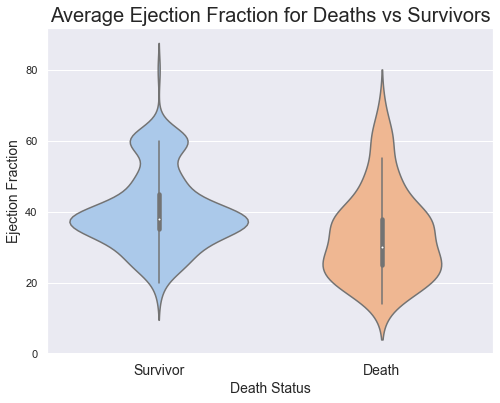

In [258]:
median_death = df_master[df_master['DEATH_EVENT']==1]['ejection_fraction'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['ejection_fraction'].median()
print("Median Ejection Fraction for Death: ", median_death, '\nMedian ejection Fraction for Survivors: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='ejection_fraction')
ax.set_title('Average Ejection Fraction for Deaths vs Survivors', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
ax.set_ylabel('Ejection Fraction', fontsize=14)
plt.show()

The deaths in our sample seem to have slightly lower ejection fraction compared to the survivors.

Median Death:  1.3 
Median Life:  1.0 
Difference:  0.30000000000000004


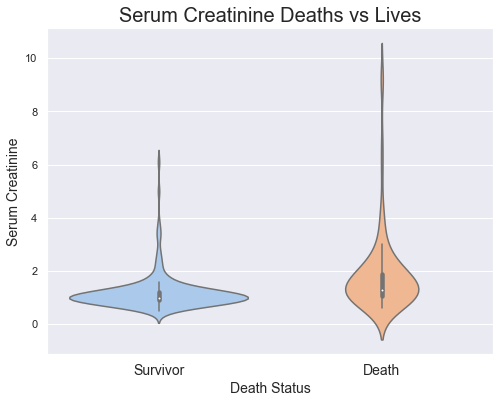

In [259]:
median_death = df_master[df_master['DEATH_EVENT']==1]['serum_creatinine'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['serum_creatinine'].median()
print("Median Death: ", median_death, '\nMedian Life: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='serum_creatinine')
ax.set_title('Serum Creatinine Deaths vs Lives', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_ylabel('Serum Creatinine', fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
plt.show()

Serum creatinine levels seem to be very similar, though the deaths have much more outliers on the high end.

Median Death:  44.5 
Median Life:  172.0 
Difference:  -127.5


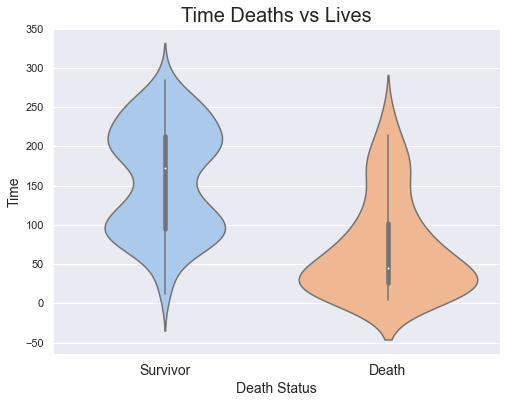

In [260]:
median_death = df_master[df_master['DEATH_EVENT']==1]['time'].median()
median_life = df_master[df_master['DEATH_EVENT']==0]['time'].median()
print("Median Death: ", median_death, '\nMedian Life: ', median_life, '\nDifference: ', median_death-median_life)

ax = sns.violinplot(data=df_master, x='DEATH_EVENT', y='time')
ax.set_title('Time Deaths vs Lives', fontsize=20)
ax.set_xticklabels(['Survivor', 'Death'], fontsize=14)
ax.set_ylabel('Time', fontsize=14)
ax.set_xlabel('Death Status', fontsize=14)
plt.show()

We can clearly see the time variable is widely dispersed and does not follow a normal distribution especially for survivors. Now let's perform some multivariate analysis to see if there is anything interesting there.

<AxesSubplot:xlabel='serum_creatinine', ylabel='age'>

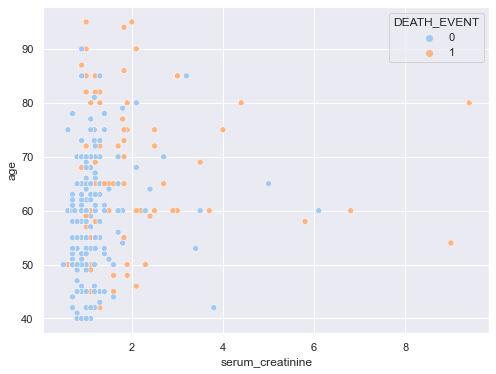

In [261]:
sns.scatterplot(x=df_master['serum_creatinine'], y=df_master['age'], hue=df_master['DEATH_EVENT'])

Across all age levels we see a greater concentration of survivors having lower serum creatinine levels, with most deaths appearing to have average serum creatinine levels slightly greater than the average level for survivors.

<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>

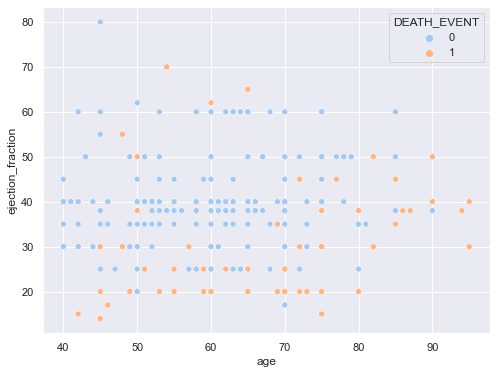

In [262]:
sns.scatterplot(data=df_master, x='age', y='ejection_fraction', hue='DEATH_EVENT')

No explicitly clear trends here, though it seems there is a greater concentration of deaths at lower ejection fraction levels at all ages.

<AxesSubplot:xlabel='age', ylabel='serum_sodium'>

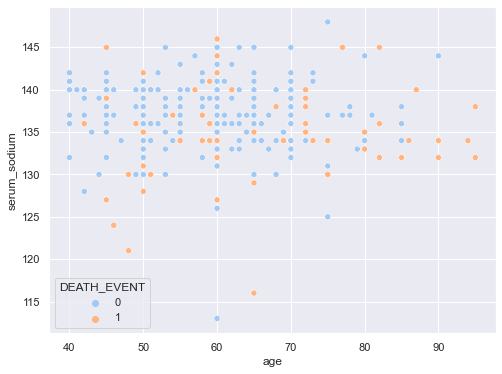

In [263]:
sns.scatterplot(data=df_master, x='age', y='serum_sodium', hue='DEATH_EVENT')

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

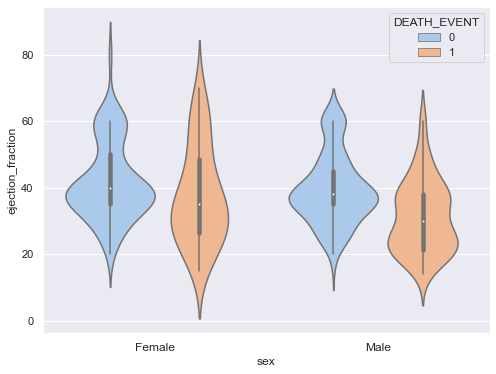

In [264]:
ax = sns.violinplot(data=df_master, x='sex', y='ejection_fraction', hue='DEATH_EVENT')
ax.set_xticklabels(['Female', 'Male'], fontsize=12)

It appears females overall have a slightly higher ejection fraction on average than males, slightly more notable in those who died.  The female deaths have a more dispersed ejection fraction than male deaths.

Lower ejection fraction appears correlated to higher chance of death via heart disease.  This seems to hold for both males and females. Males seem to have lower overall ejection fraction than females in the sample.

c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


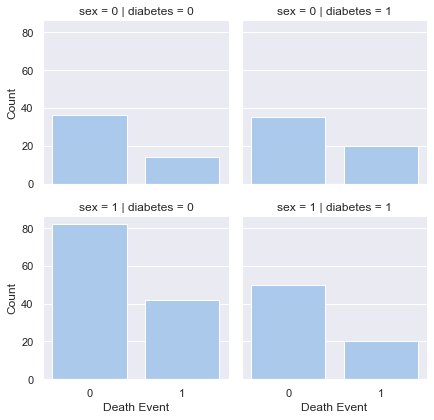

In [265]:
g = sns.FacetGrid(df, row='sex', col='diabetes')
g.map(sns.countplot, 'DEATH_EVENT')
g.set_axis_labels("Death Event", "Count")

The ratio of deaths/survivors for males without diabetes is roughly 2x, compared to ~2.5x for males with diabetes.  For females, the ratio of deaths/survivors is higher in people without diabetes vs with diabetes.

# Data Preprocessing / Modeling

In [266]:
X = df_master_scaled.drop(['DEATH_EVENT', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'platelets', 'smoking'], axis=1)
y = df[['DEATH_EVENT']]

In [267]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,1.193302,0.000166,-1.530560,0.490057,-1.504036,-1.629502
1,-0.490896,7.514640,-0.007077,-0.284552,-0.141976,-1.603691
2,0.351203,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785
3,-0.911945,-0.486071,-1.530560,0.490057,0.085034,-1.590785
4,0.351203,-0.435486,-1.530560,1.264666,-4.682176,-1.577879


In [268]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [270]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
161,-1.332995,-0.466456,-0.260991,-0.575031,0.539054,-0.119519
260,-0.490896,-0.532527,0.162199,-0.381379,0.312044,1.325935
218,0.603833,0.453367,-0.260991,-0.284552,-0.595996,0.861324
123,-0.069846,0.000166,-0.684180,-0.478205,1.901114,-0.455071
39,-0.069846,-0.358060,-0.007077,1.555145,1.220084,-1.293951
...,...,...,...,...,...,...
203,-0.069846,-0.539753,-1.107370,2.039276,-0.141976,0.732266
255,-0.743526,-0.403483,-0.684180,-0.381379,1.220084,1.106535
72,2.035401,5.471619,-0.260991,-0.381379,-1.050016,-0.751905
235,1.361722,-0.488136,1.008578,-0.284552,0.085034,1.016195


In [271]:
y_train

,DEATH_EVENT
161,0
260,0
218,0
123,0
39,1
...,...
203,0
255,0
72,1
235,0


In [272]:
# Models 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [273]:
# method borrowed from Kaggle user XXX

model_list = dict()
model_list['Decision Tree'] = DecisionTreeClassifier(class_weight={0:1,1:2})
model_list['Random Forest'] = RandomForestClassifier(class_weight={0:1,1:2})
model_list['Logreg'] = LogisticRegression()
model_list['GradientBoost'] = GradientBoostingClassifier()
model_list['AdaBoost'] = AdaBoostClassifier()
model_list['XGBoost'] = xgboost.XGBClassifier()

In [274]:
for model in model_list:
    model_list[model].fit(X_train, y_train)
    print(model + ' : fit')

Decision Tree : fit
Random Forest : fit
Logreg : fit
GradientBoost : fit

<ipython-input-274-cf38c165f9d2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_list[model].fit(X_train, y_train)
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



AdaBoost : fit
[17:53:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : fit


c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\tenoc\desktop\python_code\insurance_venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [275]:
print("Train set prediction")
for item in model_list:
        
    print(item)
    model = model_list[item]
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Train set prediction
Decision Tree
[[157   0]
 [  0  82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        82

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Random Forest
[[157   0]
 [  0  82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        82

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Logreg
[[139  18]
 [ 27  55]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       157
           1       0.75      0.67      0.71        82

    accuracy                           0.81       239
   

<AxesSubplot:>

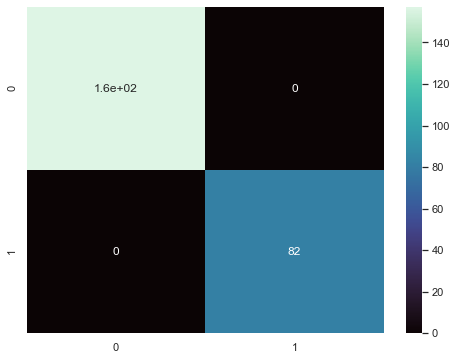

In [276]:
# correlation matrix for the gradient boost model

model = model_list['GradientBoost']
y_train_pred = model.predict(X_train)
arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
sns.heatmap(confusion_matrix(**arg_train), annot=True, cmap='mako')

<AxesSubplot:>

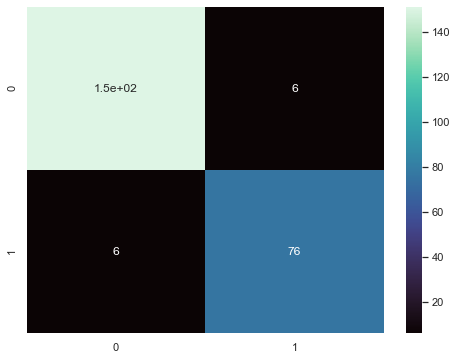

In [277]:
# correlation matrix for the adaboost model

model = model_list['AdaBoost']
y_train_pred = model.predict(X_train)
arg_train = {'y_true':y_train, 'y_pred':y_train_pred}
sns.heatmap(confusion_matrix(**arg_train), annot=True, cmap='mako')

In [278]:
print("Test set prediction")
for item in models:
        
    print(item)
    model = model_list[item]
    y_test_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

Test set prediction
Decision Tree
[[37  9]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.53      0.71      0.61        14

    accuracy                           0.78        60
   macro avg       0.71      0.76      0.73        60
weighted avg       0.81      0.78      0.79        60

Random Forest
[[42  4]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.79      0.76        14

    accuracy                           0.88        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.89      0.88      0.88        60

Logreg
[[42  4]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.79      0.76        14

    accuracy                           0.88        60
   macro avg    

Decision Tree


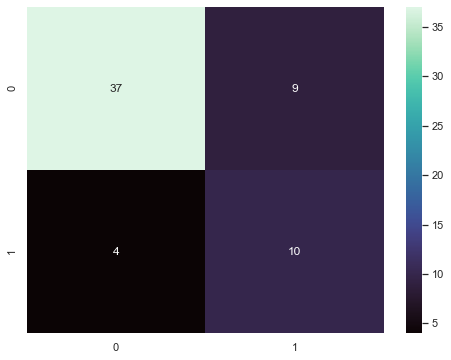

Random Forest


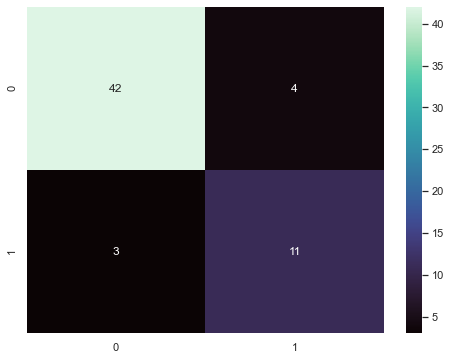

Logreg


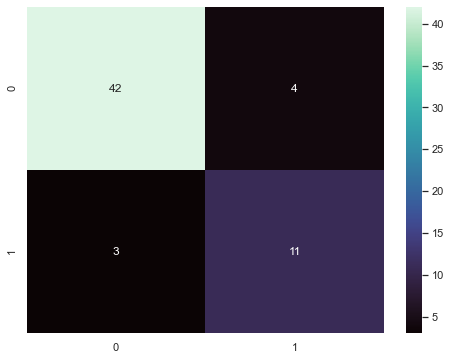

GradientBoost


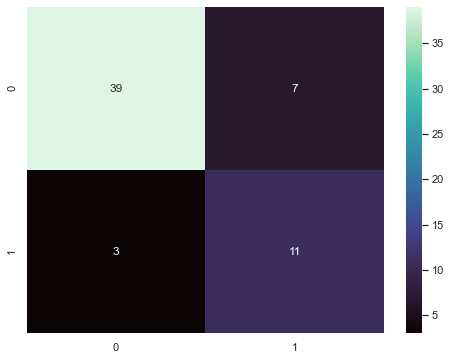

AdaBoost


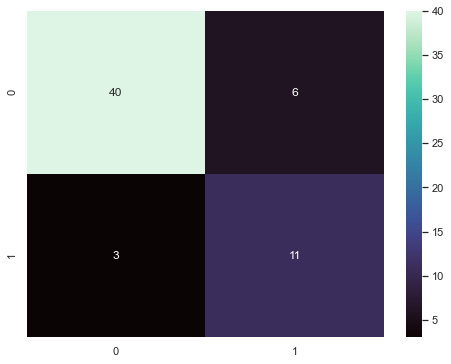

XGBoost


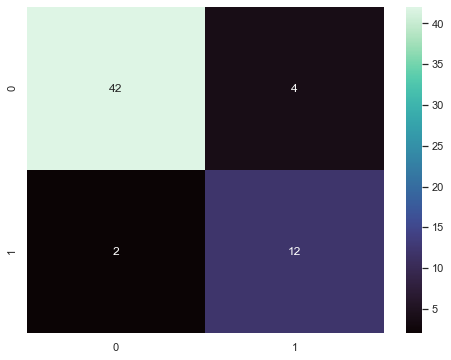

In [279]:
# correlation matrices for each model in model_list

for item in model_list:
        
    print(item)
    model = model_list[item]
    y_test_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='mako')
    plt.show()

It seems the XGBoost model has the highest average recall score of the models, closely followed by the random forest and logistical regression models.

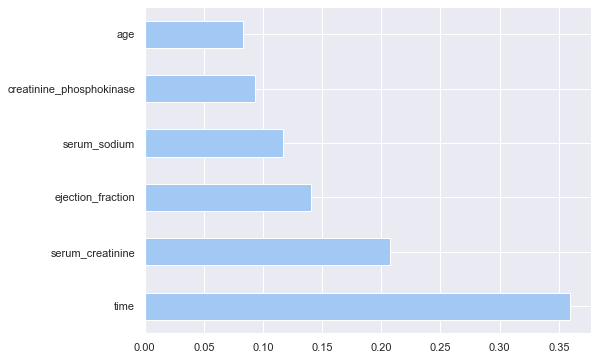

In [280]:
#plot graph of feature importances
feat_importances = pd.Series(model_list['XGBoost'].feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We see the time feature carries the greatest importance for the XGBoost model.

I hope you enjoyed my exploratory analysis and basic model development with the heart disease dataset.  There is quite a bit more that can be done to further explore the data and improve the model performances, which I will likely explore in further revisions to this analysis.  Any feedback/suggestions to help improve my work would be greatly appreciated, as I am new to the field of Data Science.